In [20]:
import matplotlib.pyplot as plt

In [21]:
%reset -f

In [22]:
import matplotlib.pyplot as plt
import os
import numpy as np
import parsing
import copy
import vertex
import time
import movement
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%reload_ext autoreload

In [25]:

# import vertex
# import cell
# import data_holder
# import geometry

%matplotlib inline

In [24]:
data = parsing.read_data(
    os.path.join("data", "network_vertices.txt"),
    os.path.join("data", "cell_indices.txt"), 5.5, 5.5
)

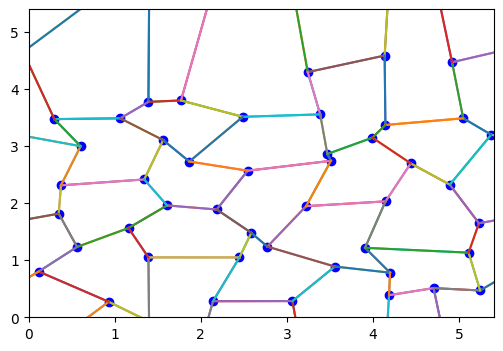

In [26]:
# This chunk graphs t = 0
# general setup
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlim(0, 5.4)
plt.ylim(0, 5.4)
# graph vertices
for v in data.vert_list:
    plt.scatter(v.x, v.y, c = "blue")

# graph lines
for cell in data.cell_list:
    # xcoords = []
    # ycoords = []
    # # generate list of x coords
    # for i in range(len(cell.vert_obj_list)):
    #     xcoords.append(cell.vert_obj_list[i].x)
    # xcoords.append(cell.vert_obj_list[0].x)
    # # generate list of y coords
    # for i in range(len(cell.vert_obj_list)):
    #     ycoords.append(cell.vert_obj_list[i].y)
    # ycoords.append(cell.vert_obj_list[0].y)
    # ax.plot(xcoords, ycoords)
    for i in range(len(cell.vert_obj_list)):
        x1 = cell.vert_obj_list[i].x
        y1 = cell.vert_obj_list[i].y
        x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
        y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
        # if any boundaries broken, must check which boundaries
        # then draw 2 segments connecting to the edge of the border
        if abs(x1 - x2) > data.lx / 2 or abs(y1 - y2) > data.ly / 2:
            # segment 1
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x2 += data.lx
                else:
                    x1 += data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y2 += data.lx
                else:
                    y1 += data.lx
            ax.plot([x1, x2],
                    [y1, y2])
            # segment 2
            x1 = cell.vert_obj_list[i].x
            y1 = cell.vert_obj_list[i].y
            x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
            y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x1 -= data.lx
                else:
                    x2 -= data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y1 -= data.lx
                else:
                    y2 -= data.lx
            ax.plot([x1, x2],
                    [y1, y2])
        # no boundaries broken
        # when no periodic boundaries broken, just draw one segment
        else:
            ax.plot([x1, x2],
                    [y1, y2])

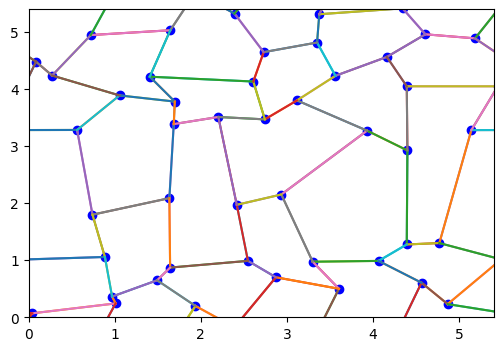

In [19]:
movement.move_vertices(data.vert_list, data)
# This chunk graphs t = 0
# general setup
fig = plt.figure(figsize = (6,4))
ax = fig.add_subplot(1, 1, 1)
plt.xlim(0, 5.4)
plt.ylim(0, 5.4)
# graph vertices
for v in data.vert_list:
    plt.scatter(v.x, v.y, c = "blue")

# graph lines
for cell in data.cell_list:
    # xcoords = []
    # ycoords = []
    # # generate list of x coords
    # for i in range(len(cell.vert_obj_list)):
    #     xcoords.append(cell.vert_obj_list[i].x)
    # xcoords.append(cell.vert_obj_list[0].x)
    # # generate list of y coords
    # for i in range(len(cell.vert_obj_list)):
    #     ycoords.append(cell.vert_obj_list[i].y)
    # ycoords.append(cell.vert_obj_list[0].y)
    # ax.plot(xcoords, ycoords)
    for i in range(len(cell.vert_obj_list)):
        x1 = cell.vert_obj_list[i].x
        y1 = cell.vert_obj_list[i].y
        x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
        y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
        # if any boundaries broken, must check which boundaries
        # then draw 2 segments connecting to the edge of the border
        if abs(x1 - x2) > data.lx / 2 or abs(y1 - y2) > data.ly / 2:
            # segment 1
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x2 += data.lx
                else:
                    x1 += data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y2 += data.lx
                else:
                    y1 += data.lx
            ax.plot([x1, x2],
                    [y1, y2])
            # segment 2
            x1 = cell.vert_obj_list[i].x
            y1 = cell.vert_obj_list[i].y
            x2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].x
            y2 = cell.vert_obj_list[(i + 1) % len(cell.vert_obj_list)].y
            if abs(x1 - x2) > data.lx / 2:
                if x1 > x2:
                    x1 -= data.lx
                else:
                    x2 -= data.lx
            if abs(y1 - y2) > data.ly / 2:
                if y1 > y2:
                    y1 -= data.lx
                else:
                    y2 -= data.lx
            ax.plot([x1, x2],
                    [y1, y2])
        # no boundaries broken
        # when no periodic boundaries broken, just draw one segment
        else:
            ax.plot([x1, x2],
                    [y1, y2])
            


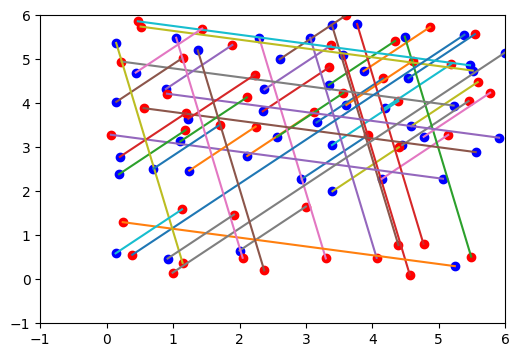

In [53]:
# Testing move

# # general setup
# fig = plt.figure(figsize = (6,4))
# ax = fig.add_subplot(1, 1, 1)
# plt.xlim(-1, 6)
# plt.ylim(-1, 6)
# # graph vertices
# for v in data.vert_list:
#     plt.scatter(v.x, v.y, c = "blue")

# old_list = copy.deepcopy(data.vert_list)

# movement.move_vertices(data.vert_list, data)

# for v in data.vert_list:
#     plt.scatter(v.x, v.y, c = "red")

# for old, new in zip(old_list, data.vert_list):
#     ax.plot([old.x, new.x], [old.y, new.y])

In [20]:
# Testing vertex_boundary_check
v = [vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3),
     vertex.Vertex(1, 3), 
     vertex.Vertex(1, 3), 
     ]

In [32]:
v2 = np.zeros([50,2])
v2

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [35]:
len(v2)

50

In [36]:
start = time.time()
for vert in v:
    vert.x += 1
    vert.y += 1
end = time.time() - start
print(end * 1000)
start = time.time()
for i in range(len(v2)):
    v2[[1, 3, 5, 6, 7, 8]]
end = time.time() - start
print(end * 1000)
    

0.06508827209472656
0.7388591766357422


In [3]:
v1 = [1, 1]
v2 = [4, 1]

In [4]:
hi = data_holder.Data_Holder(None, None)
geometry.__vertex_boundary_check(v1, v2, hi)

[-1, 1]

In [5]:
geometry.create_polygon(v, hi)

[[1, 1], [1, 3], [3, 3], [3, 1]]

In [6]:
v

[V(1, 1), V(1, 3), V(3, 3), V(3, 1)]

In [7]:
geometry.distance_formula([0,0], [1,1])

1.4142135623730951

In [8]:
joe = cell.Cell(v, hi)
joe

Polygon with vertices: [V(1, 1), V(1, 3), V(3, 3), V(3, 1)]

In [9]:
joe.fake_polygon

[[1, 1], [1, 3], [3, 3], [3, 1]]

In [ ]:
type(joe.area)

: 

In [11]:
joe.perimeter

8.0

In [12]:
joe.get_area()

In [ ]:
zed = 4
zed /= 1
zed

: 

In [ ]:
5 % 5

: 

NameError: name 'jljkljj' is not defined

In [31]:
arr = np.array([[1, 1], [1, 2]])

In [38]:
newarr = arr[np.any(arr == 2, axis = 1)]

In [39]:
newarr

array([[1, 2]])

In [40]:
np.any(arr == 2, axis = 1)

array([False,  True])

In [44]:
j = np.array([[2, 1],
          [3,4],
          [5, 1]])

In [45]:
j2 = j.view()

In [46]:
j2

array([[2, 1],
       [3, 4],
       [5, 1]])

In [47]:
j2[2][0] = 1

In [48]:
j2

array([[2, 1],
       [3, 4],
       [1, 1]])

In [49]:
j

array([[2, 1],
       [3, 4],
       [1, 1]])

In [ ]:
j3 = j.view()